# Analyzing customer purchasing behavior using association rule mining for retail optimization

In [27]:
! pip install pandas mlxtend

In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Read a File

In [8]:
df =pd.read_csv(r"C:\Users\ms900\OneDrive\Desktop\Groceries_data.csv")

## Convert string of items into a list

In [14]:
df['Transaction'] = df['Member_number'].astype(str) + "_" + df['Date'].astype(str)

In [15]:
## Group items into list per transaction

In [16]:
transactions = df.groupby('Transaction')['itemDescription'].apply(list).tolist()

In [17]:
## Use TransactionEncoder from mlxtend

In [18]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [19]:
## Apply Apriori Algorithm

In [20]:
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
# Get frequent itemsets with minimum support
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [23]:
## Rule
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [29]:
# Filtering strong rule
strong_rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1.2)]
print(strong_rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


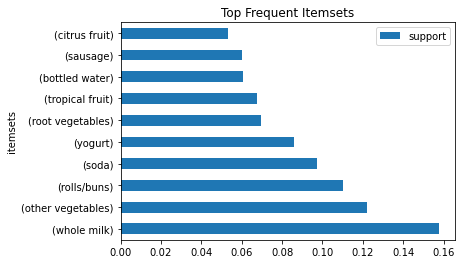

In [41]:
import matplotlib.pyplot as plt

# Top 10 frequent itemsets
frequent_itemsets.sort_values('support', ascending=False).head(10).plot(
    x='itemsets', y='support', kind='barh', title='Top Frequent Itemsets')
plt.show()

C:\Users\ms900\AppData\Local\Temp/ipykernel_41924/1761926088.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(top_itemsets['support'], labels=top_itemsets['itemsets'], autopct='%1.1f%%', startangle=140)


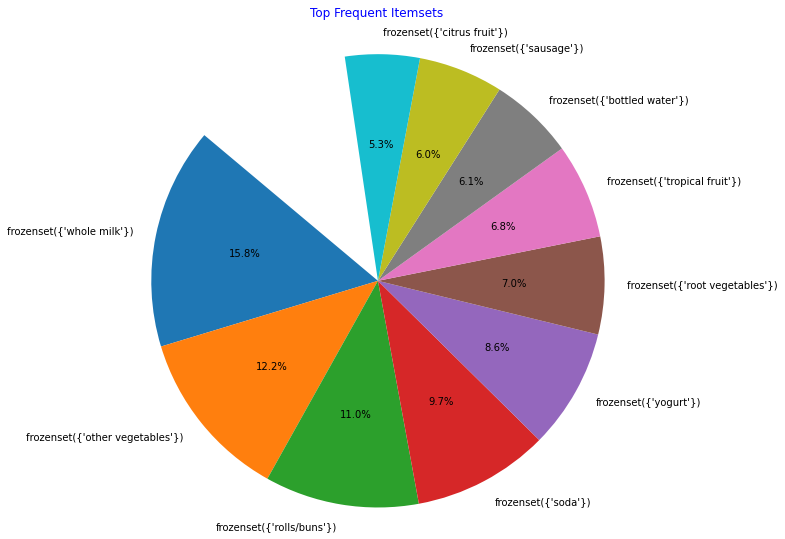

In [36]:
# Top 10 frequent itemsets
top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(10)
plt.figure(figsize=(9, 9))
plt.pie(top_itemsets['support'], labels=top_itemsets['itemsets'], autopct='%1.1f%%', startangle=140)
plt.title('Top Frequent Itemsets',color = "blue",pad=20)
plt.axis('equal') 
plt.show()
